In [22]:
import numpy as np
import matplotlib.pyplot as plt
from rcnn.dataset import NIHDataset

## Backbone -RCNN Evaluation

In [4]:
loss_path = "./rcnn/losses/"

In [10]:
val_loss = np.load(loss_path + "resnext101_32x8d_val_loss_34.np.npy")
train_loss = np.load(loss_path + "resnext101_32x8d_train_loss_34.np.npy" )
assert len(val_loss) == len(train_loss)

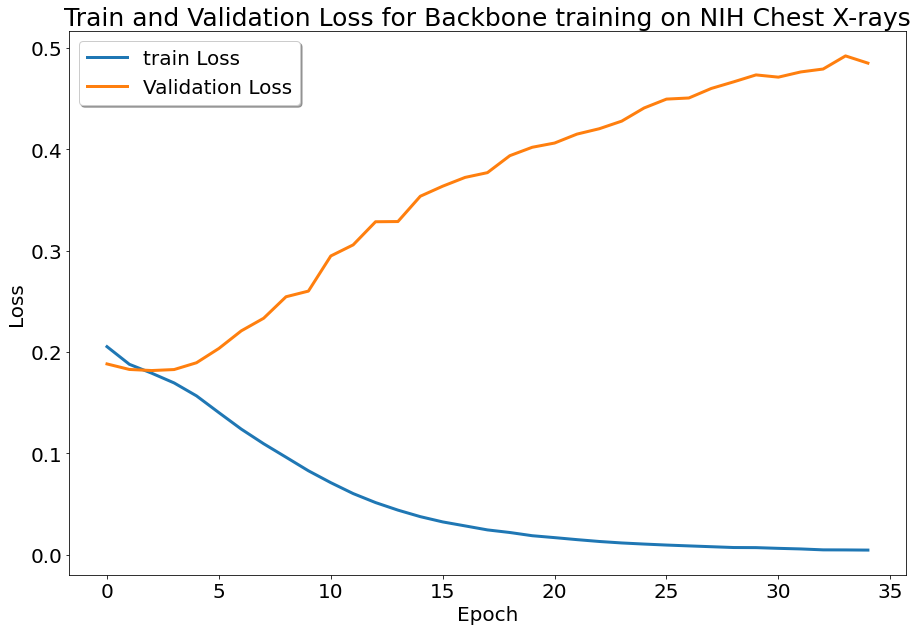

In [13]:
x = [i for i in range(len(val_loss))]

fig = plt.figure(figsize=(15,10))
plt.plot(x,train_loss , label="train Loss", linewidth=3)
plt.plot(x,val_loss, label="Validation Loss", linewidth=3)
plt.title("Train and Validation Loss for Backbone training on NIH Chest X-rays", fontsize=25)
plt.ylabel("Loss",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.legend(shadow=True, prop={'size': 20})
plt.xticks(fontsize=20 )
plt.yticks(fontsize=20 )
plt.show(block=True)
fig.savefig("../imgs/models/loss_backbone_rcnn_35.png",dpi=200)

In [23]:
### TODO: use held-out set to validate here testing statistics..
dataset = NIHDataset()

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: '..\\..\\data\\NIH\\data'